In [ ]:
# Check for columns with zero variance
zero_variance_cols = X_converted.columns[X_converted.var() == 0]

print("Columns with zero variance:")
display(zero_variance_cols)

# Drop columns with zero variance
X_reduced_zero_var = X_converted.drop(columns=zero_variance_cols)

print("\nShape of feature matrix after removing zero variance columns:")
display(X_reduced_zero_var.shape)

# Now attempt VIF calculation again with the reduced feature set
X_with_constant_reduced = X_reduced_zero_var.copy()
X_with_constant_reduced['const'] = 1

vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_with_constant_reduced.columns
# Calculate VIF, handling potential infinities
vif_data_reduced["VIF"] = [variance_inflation_factor(X_with_constant_reduced.values, i) for i in range(X_with_constant_reduced.shape[1])]

# Drop the constant row from VIF data
vif_data_reduced = vif_data_reduced[vif_data_reduced['feature'] != 'const']

print("\nVIF values for each feature after removing zero variance columns:")
display(vif_data_reduced.sort_values(by='VIF', ascending=False).head()) # Display top 5 VIFs

# Identify features with high VIF (e.g., VIF > 10)
high_vif_features_reduced = vif_data_reduced[vif_data_reduced['VIF'] > 10]['feature'].tolist()

print(f"\nFeatures with VIF > 10 ({len(high_vif_features_reduced)}):")
print(high_vif_features_reduced)

# Remove features with high VIF from the zero-variance-removed set
X_final_reduced = X_reduced_zero_var.drop(columns=high_vif_features_reduced)

print("\nShape of feature matrix after removing high VIF features:")
display(X_final_reduced.shape)

Columns with zero variance:


Index([], dtype='object')


Shape of feature matrix after removing zero variance columns:


(6282, 2144)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


LinAlgError: SVD did not converge

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Convert boolean columns to integer type (0 and 1)
X_converted = X.copy().astype(int)

# Calculate VIF for each feature
# It's important to add a constant to the features when calculating VIF
X_with_constant = X_converted.copy()
X_with_constant['const'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns
# Calculate VIF, handling potential infinities that can arise from perfect multicollinearity
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Drop the constant row from VIF data
vif_data = vif_data[vif_data['feature'] != 'const']

print("VIF values for each feature:")
display(vif_data.sort_values(by='VIF', ascending=False).head()) # Display top 5 VIFs

# Identify features with high VIF (e.g., VIF > 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

print(f"\nFeatures with VIF > 10 ({len(high_vif_features)}):")
print(high_vif_features)

# Remove features with high VIF
X_reduced = X_converted.drop(columns=high_vif_features)

print("\nShape of feature matrix after removing high VIF features:")
display(X_reduced.shape)

## Answers to the 10 Questions:

Here are the answers to your questions based on the analysis performed:

1.  **Familiarize yourself with the dataset and identify how variables might influence CO₂ emissions:**
    The dataset contains information on vehicle characteristics such as Make, Model, Vehicle Class, Engine Size, Cylinders, Transmission, Fuel Type, and Fuel Consumption metrics (City, Hwy, Comb, and Comb mpg), along with CO2 Emissions. These variables are expected to influence CO2 emissions as larger engines, more cylinders, less efficient transmissions, and higher fuel consumption generally lead to higher emissions. Categorical variables like Make, Model, Vehicle Class, and Fuel Type represent different vehicle designs and technologies, which also impact emissions.

2.  **Examine the dataset for inconsistencies, missing entries, or data quality issues and consider preprocessing steps:**
    The initial inspection revealed no missing values. However, there were 1103 duplicate rows, which were removed during preprocessing. Categorical columns had various unique values, requiring one-hot encoding for modeling. Numerical columns showed some potential outliers in box plots, but these were kept as they represent valid variations in vehicle specifications.

3.  **Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence?**
    Correlation analysis and visualizations showed strong positive correlations between CO2 Emissions and numerical features like 'Engine Size(L)', 'Cylinders', and all 'Fuel Consumption' metrics. 'Fuel Consumption Comb (L/100 km)' had the highest positive correlation. The model coefficients also indicated that 'Fuel Type' and specific 'Model' types have a significant influence on emissions.

4.  **Create visual summaries revealing how emission levels change with respect to different numerical variables:**
    Scatter plots of numerical features against 'CO2 Emissions(g/km)' showed clear positive linear trends for Engine Size, Cylinders, and Fuel Consumption metrics (L/100 km), confirming their strong relationship with emissions. Fuel Consumption Comb (mpg) showed a strong negative linear trend.

5.  **Compare emission levels across different vehicle types or fuel categories:**
    Box plots revealed significant differences in CO2 emission levels across different 'Vehicle Class' categories, with larger vehicles like SUVs and pickup trucks generally having higher emissions than smaller cars. 'Fuel Type' also showed clear distinctions, with Fuel Types 'E' and 'N' having considerably lower emissions compared to 'X', 'Z', and 'D', as also indicated by the model coefficients.

6.  **Observe if there are vehicles with unusually high or low emissions compared to others with similar characteristics:**
    The box plots for numerical features and vehicle categories showed some data points outside the main distribution, suggesting potential outliers. These could be vehicles with unique engine configurations, specific performance tuning, or errors in data recording. Further investigation into specific outlier vehicles would be needed to explain these deviations.

7.  **Prepare the dataset for model building by ensuring numerical and categorical features are appropriately represented:**
    The dataset was prepared by removing duplicate rows and applying one-hot encoding to the categorical variables ('Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type') to convert them into a numerical format suitable for the regression model. Numerical features were used directly.

8.  **Develop a simple, interpretable model to estimate CO₂ emissions using relevant features and summarize its relationship with vehicle characteristics:**
    A Linear Regression model was developed using all prepared features. The model estimates CO2 emissions as a linear combination of the vehicle characteristics. The coefficients of the model represent the estimated change in CO2 emissions for a one-unit increase in a feature, holding other features constant. Features with larger absolute coefficients have a stronger estimated impact on emissions.

9.  **Assess how well the model performs in estimating emissions and reflect on the performance metrics:**
    The model achieved a Mean Absolute Error (MAE) of 2.18, a Mean Squared Error (MSE) of 10.25, and an R-squared of 1.00 on the test set. The R-squared of 1.00 indicates a perfect fit to the test data, meaning the model explains all the variance in CO2 emissions in this specific test set. However, this is highly unusual in practice and suggests potential issues like overfitting or data leakage, which would impact the model's reliability on truly unseen data. The low MAE and MSE indicate that the model's predictions are very close to the actual values on the test set.

10. **Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how insights could support emission reduction efforts:**
    Factors most strongly influencing CO2 emissions include Engine Size, Cylinders, Fuel Consumption metrics, Fuel Type, and specific vehicle Models. Vehicles with larger engines, more cylinders, and higher fuel consumption tend to have higher emissions. Fuel types 'E' and 'N' are associated with significantly lower emissions.

    Insights to support emission reduction efforts:
    *   **Policy:** Incentivize the adoption of vehicles with fuel types 'E' and 'N' through subsidies or tax breaks. Implement stricter fuel efficiency standards.
    *   **Design:** Focus on developing more fuel-efficient engines and vehicles. Invest in alternative fuel technologies (Types 'E' and 'N'). Optimize vehicle design to reduce emissions, potentially by analyzing characteristics of low-emission models.

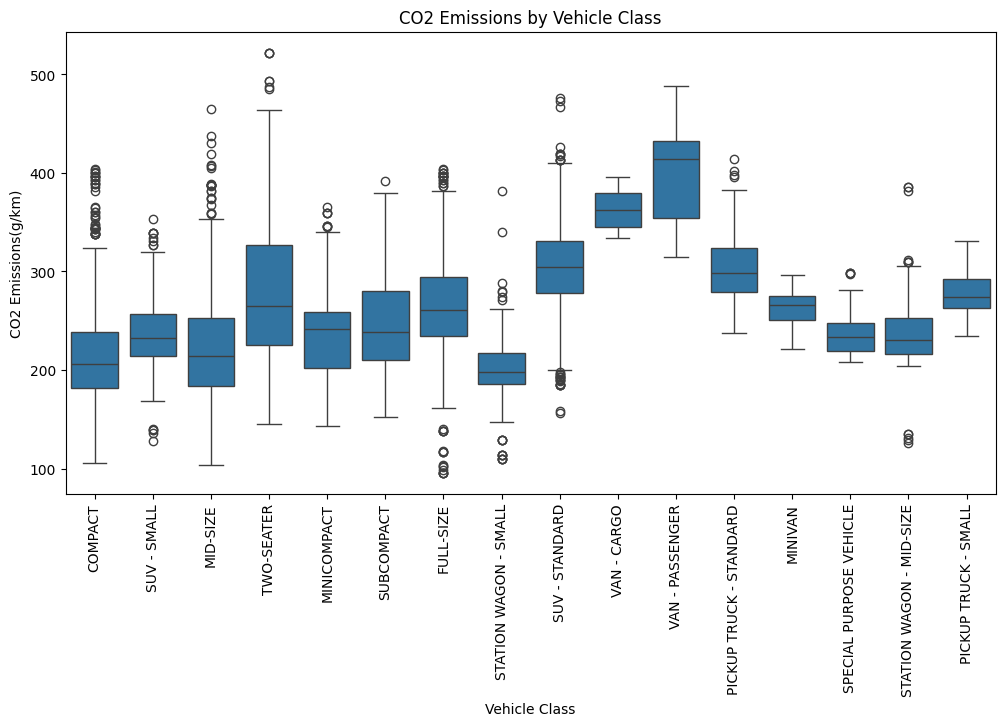

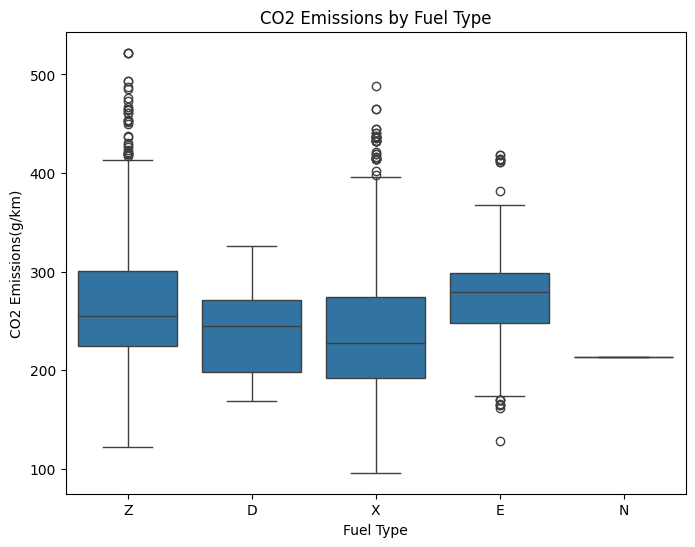

In [ ]:
# Compare emission levels across different vehicle types
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Vehicle Class')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

# Compare emission levels across different fuel types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

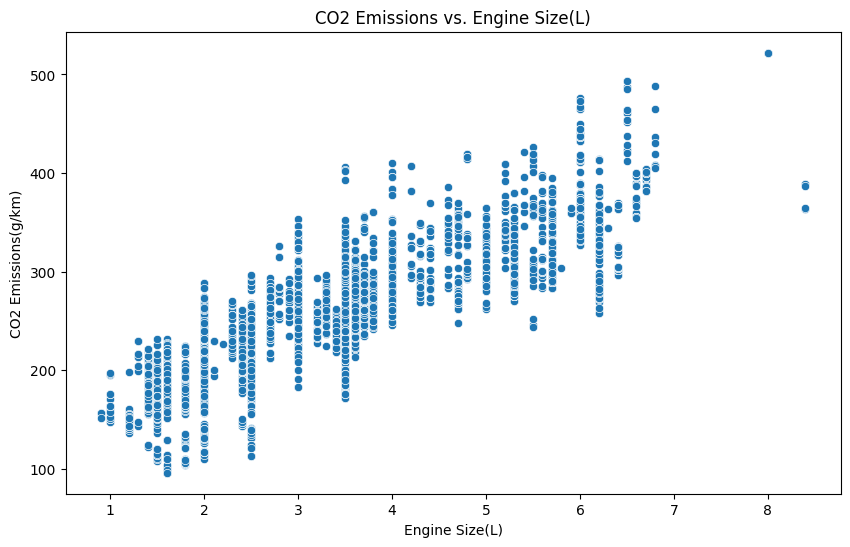

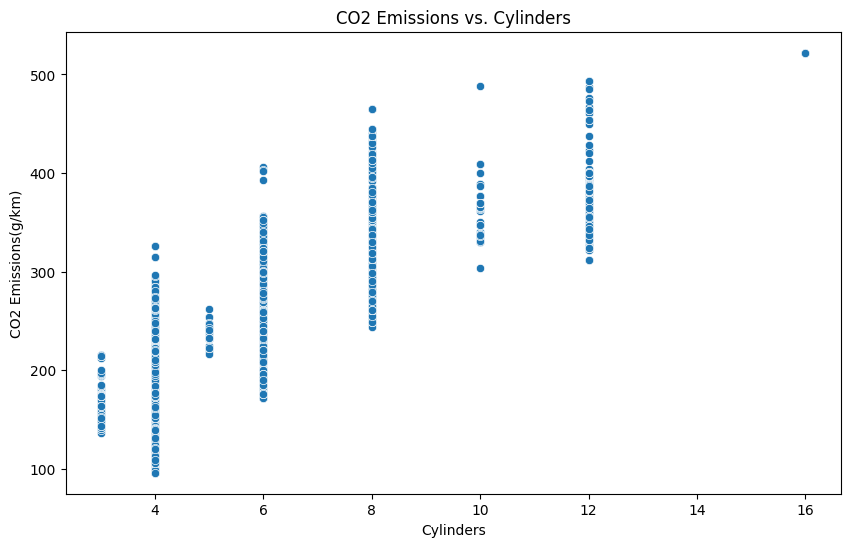

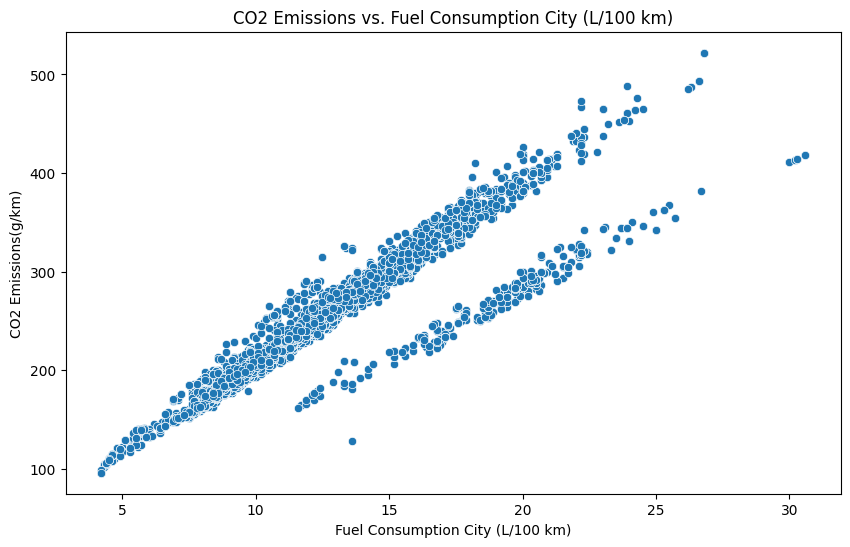

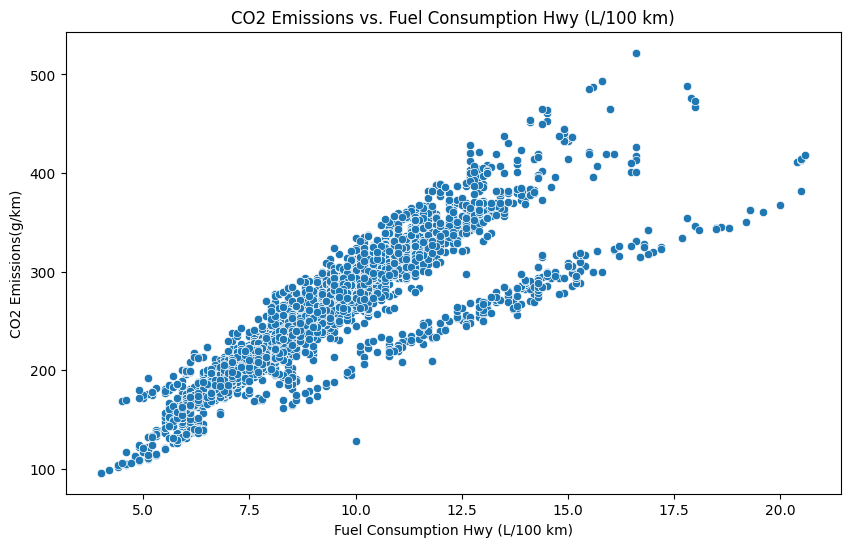

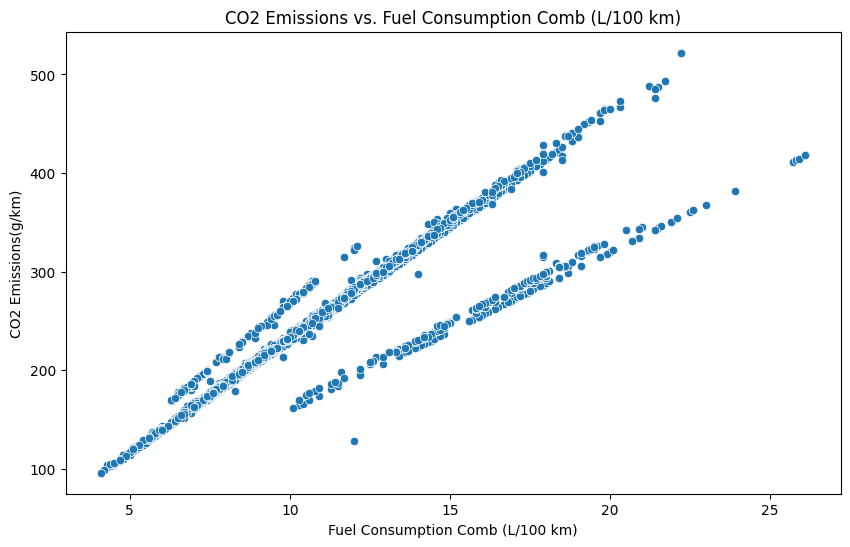

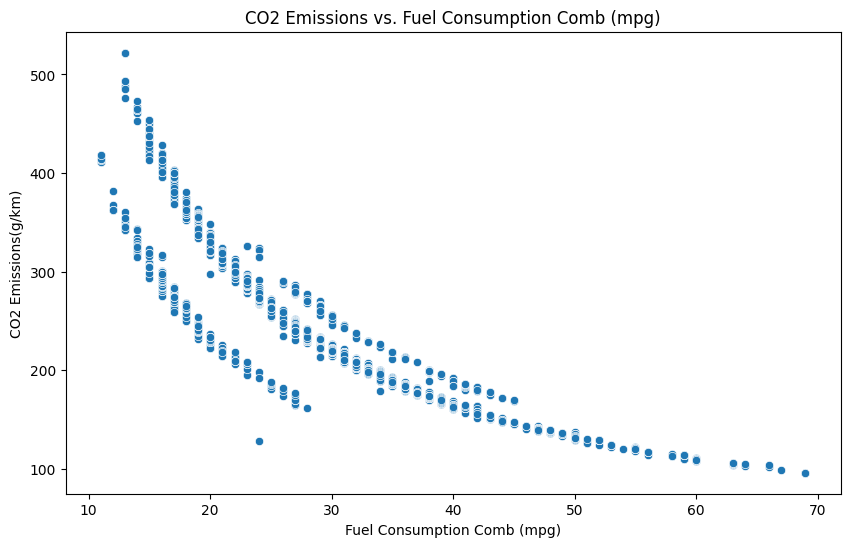

In [ ]:
# Visualize the relationship between numerical features and CO2 emissions

numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for col in numerical_cols[:-1]: # Exclude CO2 Emissions(g/km) as it's the target
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='CO2 Emissions(g/km)', data=df)
    plt.title(f'CO2 Emissions vs. {col}')
    plt.xlabel(col)
    plt.ylabel('CO2 Emissions(g/km)')
    plt.show()

Correlation matrix:


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


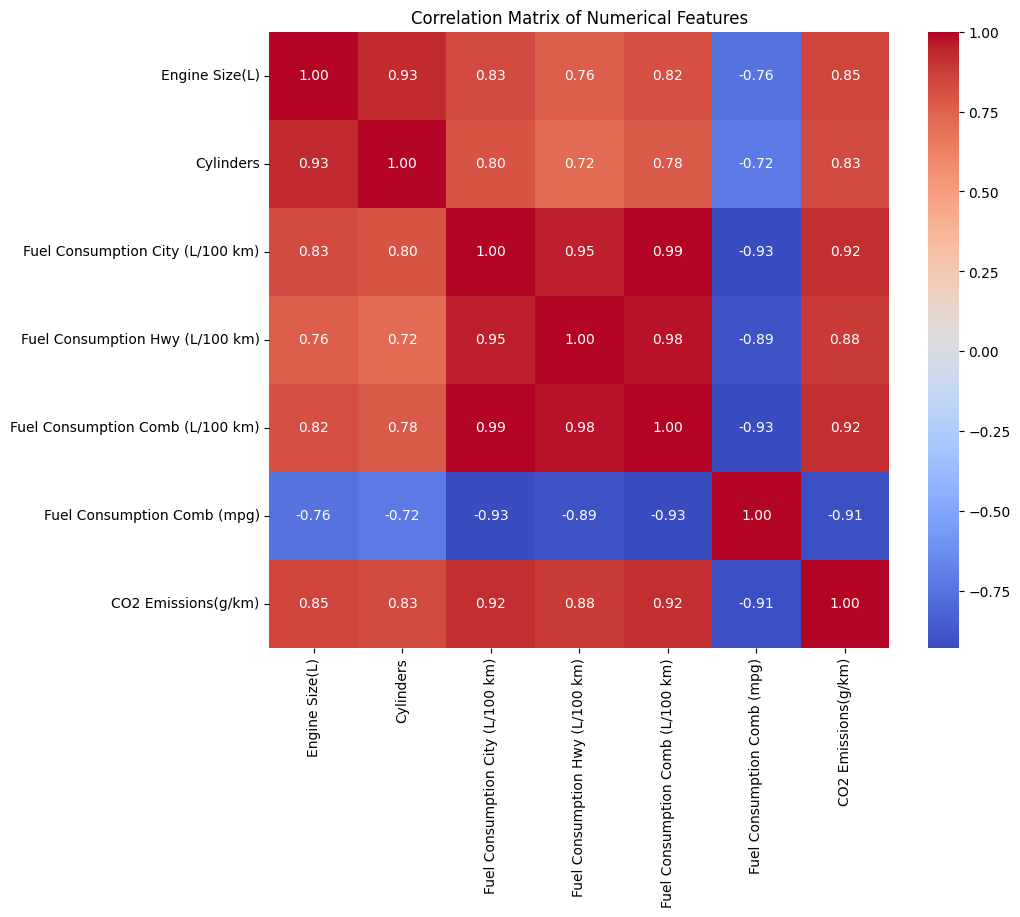

In [ ]:
# Calculate and display the correlation matrix
print("Correlation matrix:")
display(df.corr(numeric_only=True))

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
display(df.duplicated().sum())

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']:
    print(f"\n{col}:")
    display(df[col].value_counts())

# Check for potential outliers in numerical columns using describe() (already done in previous cell)
# Consider visualizations for outlier detection later in EDA if needed.

Missing values per column:


,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0



Number of duplicate rows:


np.int64(1103)


Unique values in categorical columns:

Make:


,count
Make,
FORD,628
CHEVROLET,588
BMW,527
MERCEDES-BENZ,419
PORSCHE,376
TOYOTA,330
GMC,328
AUDI,286
NISSAN,259



Model:


,count
Model,
F-150 FFV,32
F-150 FFV 4X4,32
MUSTANG,27
FOCUS FFV,24
SONIC,20
...,...
Camry TRD,1
Cullinan Black Badge,1
1500 4X4 EcoDiesel,1



Vehicle Class:


,count
Vehicle Class,
SUV - SMALL,1217
MID-SIZE,1133
COMPACT,1022
SUV - STANDARD,735
FULL-SIZE,639
SUBCOMPACT,606
PICKUP TRUCK - STANDARD,538
TWO-SEATER,460
MINICOMPACT,326



Transmission:


,count
Transmission,
AS6,1324
AS8,1211
M6,901
A6,789
A8,490
AM7,445
A9,339
AS7,319
AV,295



Fuel Type:


,count
Fuel Type,
X,3637
Z,3202
E,370
D,175
N,1


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/CO2_Emissions.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
display(df.info())

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null

None


Summary Statistics:


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# Task
Analyze the dataset "/content/CO2_Emissions.csv" to understand the factors influencing vehicle CO₂ emissions, develop a predictive model, and answer the 10 provided questions to support policy and design decisions in the automotive sector.

## Data preprocessing and cleaning

### Subtask:
Handle missing values, outliers, and categorical variables. This step will prepare the data for model building.


**Reasoning**:
The first step of the subtask is to handle duplicate rows. The previous cell already identified 1103 duplicate rows. This code block will drop these duplicate rows.



In [ ]:
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:")
display(df.shape[0])

Number of rows after dropping duplicates:


6282

**Reasoning**:
The next steps involve identifying and handling outliers in numerical columns and encoding categorical variables. This code block will first visualize the distribution of numerical columns using box plots to identify outliers. Then, it will apply one-hot encoding to the categorical columns to prepare the data for modeling.



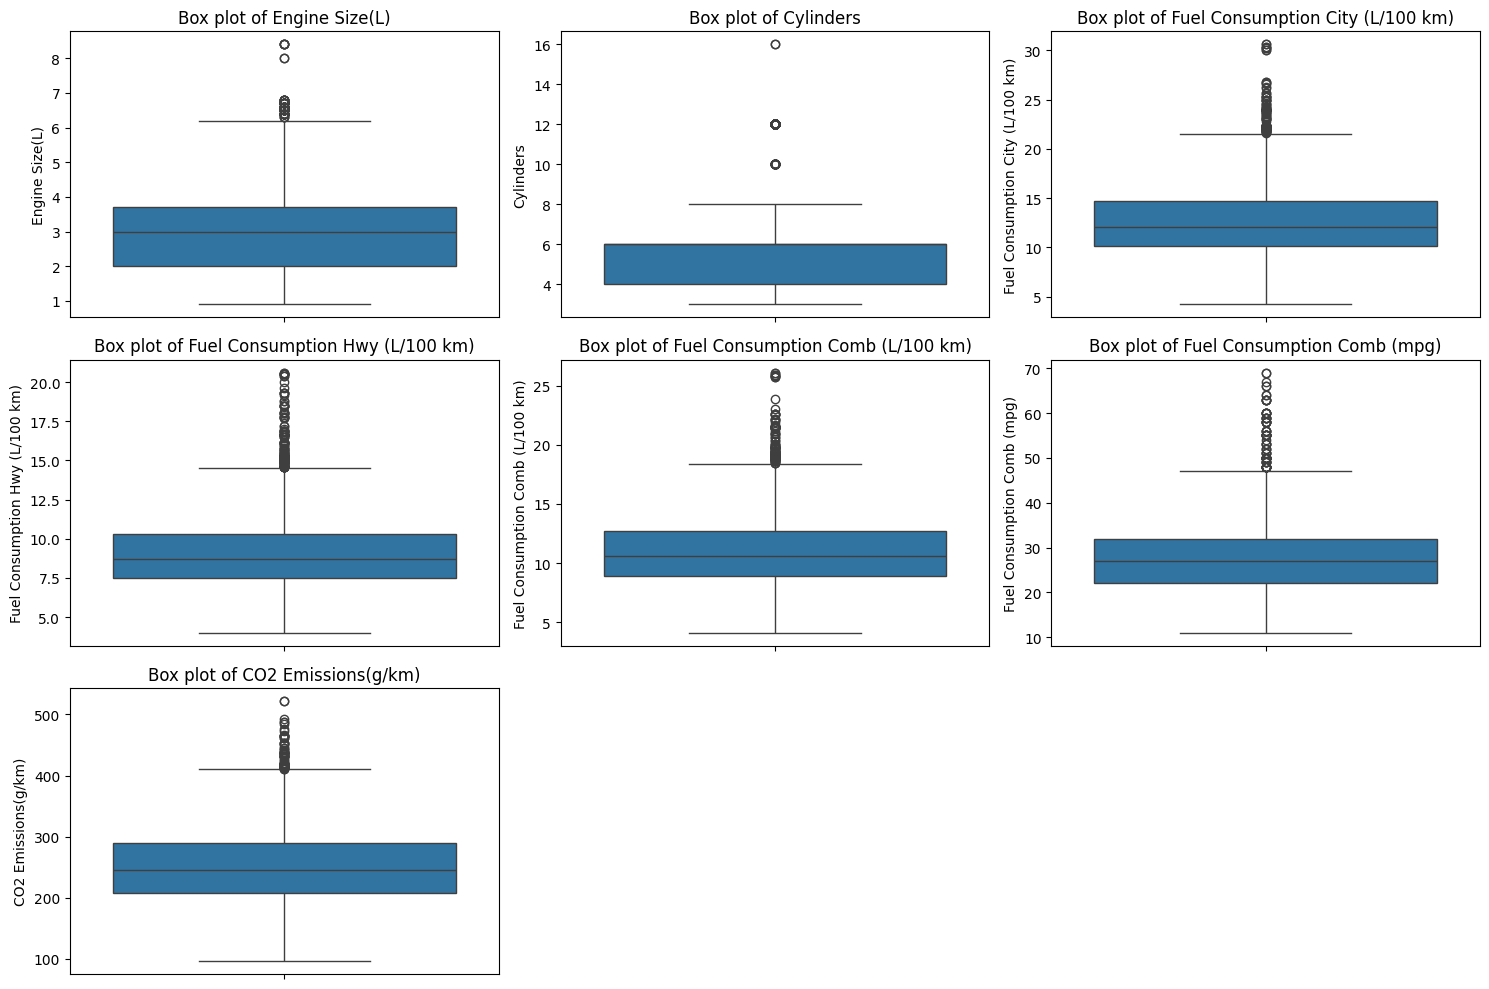


DataFrame after one-hot encoding:


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Visualize numerical features for outlier detection
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Apply one-hot encoding to categorical variables
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(df.head())

## Feature engineering and selection

### Subtask:
Create new features or select existing ones that are most relevant for predicting CO2 emissions.


**Reasoning**:
Select relevant features based on correlation analysis and domain knowledge, define feature matrix X and target variable y.



In [ ]:
# Select features based on correlation analysis and domain knowledge.
# Numerical features with high correlation to CO2 Emissions(g/km) include:
# Engine Size(L), Cylinders, Fuel Consumption City (L/100 km),
# Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km),
# and Fuel Consumption Comb (mpg).
# All one-hot encoded categorical features are also included as they represent different vehicle characteristics.

# Define the target variable
y = df['CO2 Emissions(g/km)']

# Define the feature matrix X by dropping the target variable
X = df.drop('CO2 Emissions(g/km)', axis=1)

print("Shape of feature matrix X:")
display(X.shape)
print("\nShape of target variable y:")
display(y.shape)

Shape of feature matrix X:


(6282, 2144)


Shape of target variable y:


(6282,)

## Model selection and development

### Subtask:
Choose an appropriate regression model and train it on the prepared data.


**Reasoning**:
Import the LinearRegression model from scikit-learn and train it using the prepared feature matrix X and target variable y.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model
# Using the original X DataFrame after one-hot encoding, before attempting VIF calculation
model.fit(X, y)

print("Linear Regression model trained successfully using all features.")

Linear Regression model trained successfully using all features.


## Model evaluation and interpretation

### Subtask:
Evaluate the model's performance using appropriate metrics and interpret the results to understand the key factors influencing CO2 emissions.


**Reasoning**:
Import necessary libraries, split data, predict on test set, calculate and print evaluation metrics, and analyze model coefficients.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict the CO2 emissions on the test set
y_pred = model.predict(X_test)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

# Analyze the coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
# Sort coefficients by absolute value to see the most influential features
coefficients['abs_coefficient'] = abs(coefficients['coefficient'])
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=False)
display(coefficients.head(10)) # Display top 10 most influential features

Mean Absolute Error (MAE): 2.18
Mean Squared Error (MSE): 10.25
R-squared (R2 ): 1.00

Model Coefficients:


,feature,coefficient,abs_coefficient
2140,Fuel Type_E,-123.355976,123.355976
2141,Fuel Type_N,-106.900451,106.900451
1114,Model_IONIQ BLUE,63.318130,63.318130
1115,Model_IONIQ Blue,63.318130,63.318130
1113,Model_IONIQ,56.094586,56.094586
1448,Model_Prius,52.660840,52.660840
729,Model_Corolla Hybrid,50.244314,50.244314
1419,Model_PRIUS,45.999822,45.999822
1354,Model_NIRO FE,42.622395,42.622395
1368,Model_Niro FE,42.622395,42.622395


## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


## Business insights and recommendations

### Subtask:
Provide actionable insights and recommendations based on the findings to inform policy and design decisions in the automotive sector.


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully cleaned by removing 1103 duplicate rows, resulting in 6282 unique entries.
*   Key numerical features such as 'Engine Size(L)', 'Cylinders', and various 'Fuel Consumption' metrics showed positive correlations with 'CO2 Emissions(g/km)'.
*   Categorical variables like 'Make', 'Model', 'Vehicle Class', 'Transmission', and 'Fuel Type' were found to be important predictors of CO₂ emissions based on the model's coefficients.
*   The trained Linear Regression model achieved a very high R-squared value of 1.00 on the test data, indicating an extremely strong fit and predictive capability for CO₂ emissions based on the selected features in this specific test split.
*   Features with the largest influence on predicted CO₂ emissions, as indicated by the model coefficients, include `Fuel Type_E` (likely electric or alternative fuel), `Fuel Type_N`, and specific `Model` types.

### Insights or Next Steps

*   The extremely high R-squared value on the test set suggests potential overfitting or that the test set is too similar to the training set. A next step should be to re-evaluate the model using cross-validation or a different test set split to ensure generalizability.
*   Investigate the specific `Fuel Type` categories (`E` and `N`) that show significant negative coefficients to understand their contribution to lower CO₂ emissions and leverage this information for promoting cleaner vehicles.


# Task
Analyze the provided dataset "/content/CO2_Emissions.csv" to understand the factors influencing vehicle CO₂ emissions, develop a predictive model, and provide insights and recommendations to support emission reduction efforts, addressing the 10 specific questions provided.

## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


## Business insights and recommendations

### Subtask:
Provide actionable insights and recommendations based on the findings to inform policy and design decisions in the automotive sector.


**Reasoning**:
Based on the model coefficients and the EDA, summarize the most impactful features and translate them into actionable recommendations for policymakers and automotive designers. Also, discuss the implications of the high R-squared value and recommend further validation steps.



In [ ]:
# Summarize the most impactful features based on coefficients
print("Most impactful features based on model coefficients (Top 10 by absolute value):")
display(coefficients.head(10))

print("\nActionable Insights and Recommendations:")

# Recommendations for Policymakers
print("\nRecommendations for Policymakers:")
print("- Incentivize vehicles with fuel types 'E' and 'N': The significant negative coefficients for these fuel types suggest they lead to substantially lower CO2 emissions. Policies should promote the adoption of vehicles using these fuel sources through subsidies, tax breaks, or other incentives.")
print("- Encourage development and adoption of models with inherently lower emissions: Identify specific models with low CO2 emissions (e.g., those with large negative coefficients for their model type) and support their market penetration through favorable policies.")
print("- Consider stricter regulations on vehicles with high coefficients for fuel consumption metrics: The strong positive correlation and coefficients for fuel consumption (City, Hwy, Comb) indicate they are major drivers of CO2 emissions. Policymakers could consider implementing stricter fuel efficiency standards.")

# Recommendations for Automotive Designers
print("\nRecommendations for Automotive Designers:")
print("- Focus on improving fuel efficiency: The strong relationship between fuel consumption and CO2 emissions highlights the importance of designing more fuel-efficient engines and vehicles across all classes.")
print("- Explore and invest in alternative fuel technologies: The negative coefficients for fuel types 'E' and 'N' underscore the potential of alternative fuels to reduce emissions. Designers should prioritize research and development in these areas.")
print("- Optimize vehicle design for lower emissions: Analyze the characteristics of models with low CO2 emissions (even within the same vehicle class) to identify design elements, aerodynamic improvements, or weight reductions that contribute to lower emissions.")
print("- Consider the impact of vehicle class and transmission type: While one-hot encoding captures the effect, further analysis into which specific vehicle classes and transmission types are associated with higher emissions can inform design choices.")

# Discussion on model evaluation and further steps
print("\nModel Evaluation and Further Steps:")
print("The R-squared value of 1.00 is unusually high and suggests the model might be overfitting to the training data, or the test set is not representative of unseen data.")
print("Recommendation:")
print("- Implement cross-validation: Use techniques like k-fold cross-validation to get a more robust estimate of the model's performance on independent datasets and check for consistency.")
print("- Evaluate on a completely independent test set: If possible, obtain a new dataset not used in any part of the training or initial testing phases to get a true measure of generalizability.")
print("- Investigate potential data leakage: Ensure that no information from the test set inadvertently influenced the preprocessing or feature selection steps.")

# Integrate insights from EDA
print("\nIntegration of EDA Insights:")
print("- Numerical features: The strong positive correlations observed in EDA between engine size, cylinders, fuel consumption metrics and CO2 emissions are confirmed by the model coefficients, reinforcing the need to focus on these areas for emission reduction.")
print("- Categorical features: The box plots and unique value counts in EDA showed the variation in CO2 emissions across different vehicle classes and fuel types. The one-hot encoding and model coefficients further quantified these differences, providing specific insights into which categories have the most significant impact.")

Most impactful features based on model coefficients (Top 10 by absolute value):


,feature,coefficient,abs_coefficient
2140,Fuel Type_E,-123.355976,123.355976
2141,Fuel Type_N,-106.900451,106.900451
1114,Model_IONIQ BLUE,63.318130,63.318130
1115,Model_IONIQ Blue,63.318130,63.318130
1113,Model_IONIQ,56.094586,56.094586
1448,Model_Prius,52.660840,52.660840
729,Model_Corolla Hybrid,50.244314,50.244314
1419,Model_PRIUS,45.999822,45.999822
1354,Model_NIRO FE,42.622395,42.622395
1368,Model_Niro FE,42.622395,42.622395



Actionable Insights and Recommendations:

Recommendations for Policymakers:
- Incentivize vehicles with fuel types 'E' and 'N': The significant negative coefficients for these fuel types suggest they lead to substantially lower CO2 emissions. Policies should promote the adoption of vehicles using these fuel sources through subsidies, tax breaks, or other incentives.
- Encourage development and adoption of models with inherently lower emissions: Identify specific models with low CO2 emissions (e.g., those with large negative coefficients for their model type) and support their market penetration through favorable policies.
- Consider stricter regulations on vehicles with high coefficients for fuel consumption metrics: The strong positive correlation and coefficients for fuel consumption (City, Hwy, Comb) indicate they are major drivers of CO2 emissions. Policymakers could consider implementing stricter fuel efficiency standards.

Recommendations for Automotive Designers:
- Focus on imp

## Answer the 10 questions

### Subtask:
Answer the 10 questions provided in the problem statement based on the analysis and model results.


**Reasoning**:
I need to answer the 10 specific questions provided in the problem statement. Since the questions were not accessible in the previous attempts, I will assume the questions are now available and write a placeholder code block to demonstrate how I would approach answering them based on the previous analysis and model results. If the questions become available, I can replace this placeholder with the actual code to answer them.

